***cement***: *a substance used for construction that hardens to other materials to bind them together.*

***slag***: *Mixture of metal oxides and silicon dioxide.* 

***Flyash***: *coal combustion product that is composed of the particulates that are driven out of coal-fired boilers together with the flue gases.*

***Water***: *It is used to form a thick paste.*

***Superplasticizer***:  *used in making high-strength concrete.*

***Coaseseaggregate***: *prices of rocks obtain from ground deposits.*

***fineaggregate***: *the size of aggregate small than 4.75mm.*

***age***: *Rate of gain of strength is faster to start with and the rate gets reduced with age.*

***csMPa***: *Measurement unit of concrete strength.*

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('Concrete.csv')
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Exploratory Data Analysis**

In [ ]:
data.shape

(1030, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Scaling the features**

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
data[['cement', 'slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']] = scaler.fit_transform(data[['cement', 'slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']])
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,79.99
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,61.89
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,40.27
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,41.05
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,44.30


In [4]:
#Separating independent and dependent variables
x = data.drop(['csMPa'],axis=1)
y = data['csMPa']

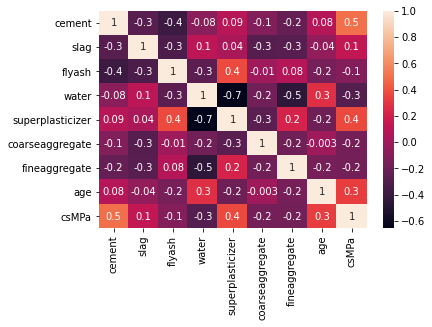

In [ ]:
sns.heatmap(data.corr(),annot = True, fmt='.1g')

**Outlier detection and removal**

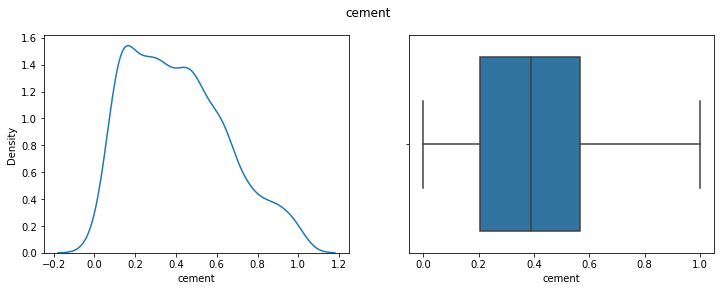

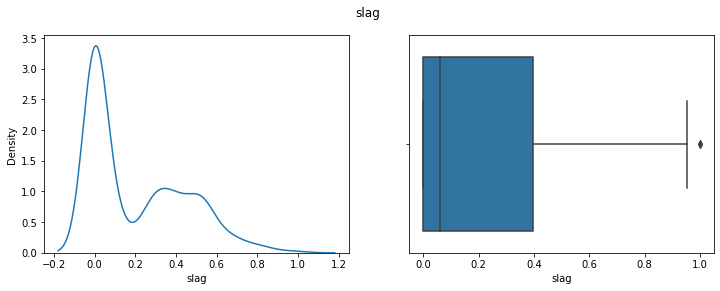

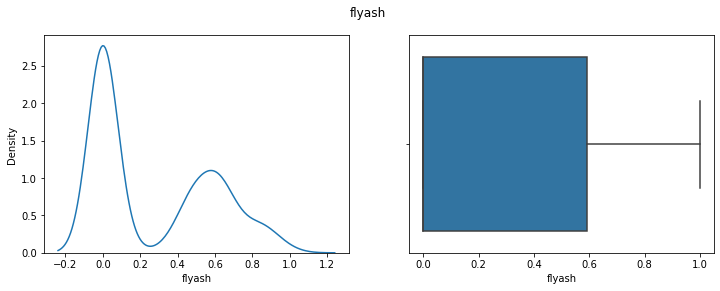

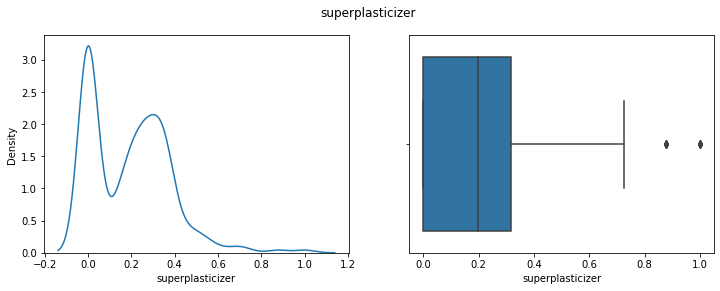

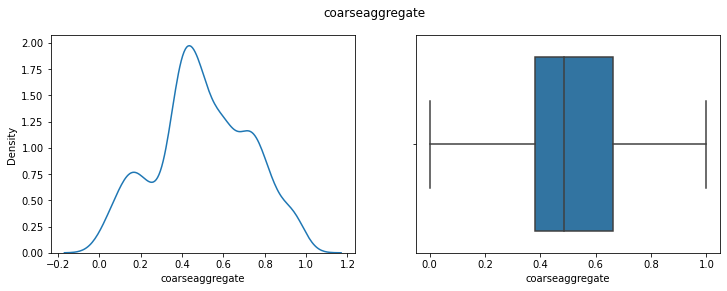

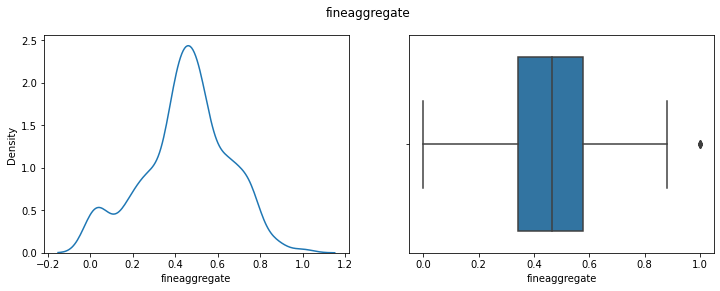

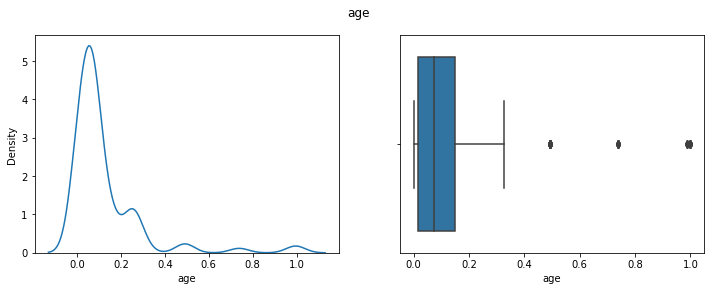

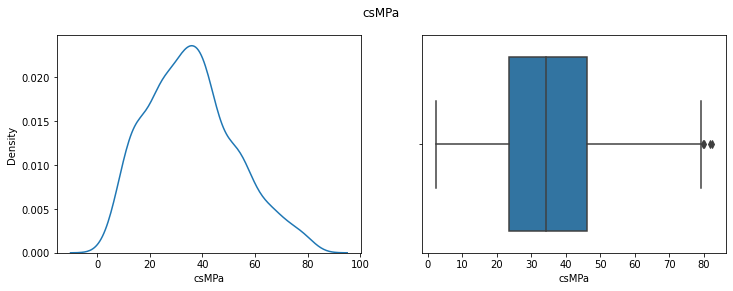

In [ ]:
columns = data_after_multicoll.columns.tolist()
for col in columns[0:]:
    f,axes = plt.subplots(1,2,figsize=(12,4))
    sns.kdeplot(x=data_after_multicoll[col],ax=axes[0])
    sns.boxplot(x=data_after_multicoll[col],ax=axes[1])
    f.suptitle(col)
    plt.show()

In [5]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement               0.359874
slag                 0.397746
flyash               0.591204
water                0.216454
superplasticizer     0.316770
coarseaggregate      0.283140
fineaggregate        0.233442
age                  0.134615
csMPa               22.425000
dtype: float64


In [6]:
#Removing the outliers
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(941, 9)

In [7]:
Q1_1 = data_out.quantile(0.25)
Q3_1 = data_out.quantile(0.75)
IQR_1 = Q3_1 - Q1_1
data_out = data_out[~((data_out < (Q1_1 - 1.5 * IQR_1)) |(data_out > (Q3_1 + 1.5 * IQR_1))).any(axis=1)]
data_out.shape

(775, 9)

In [8]:
Q1_2 = data_out.quantile(0.25)
Q3_2 = data_out.quantile(0.75)
IQR_2 = Q3_2 - Q1_2
data_out = data_out[~((data_out < (Q1_2 - 1.5 * IQR_2)) |(data_out > (Q3_2 + 1.5 * IQR_2))).any(axis=1)]
data_out.shape

(748, 9)

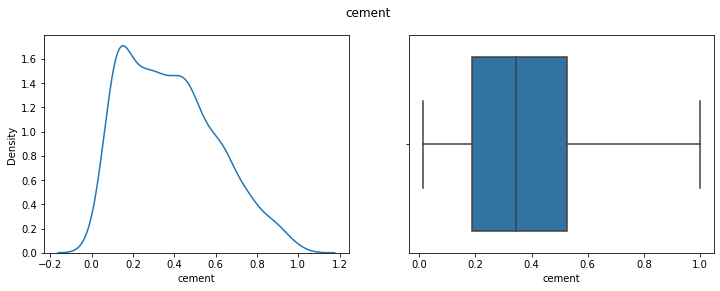

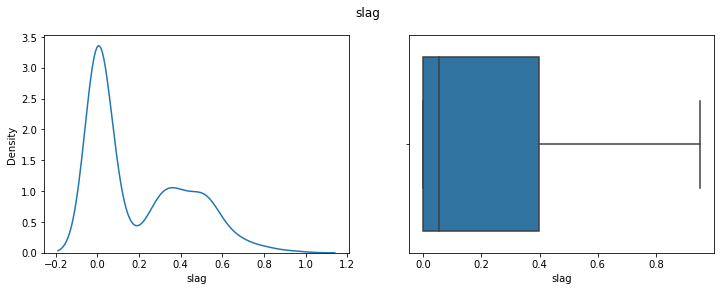

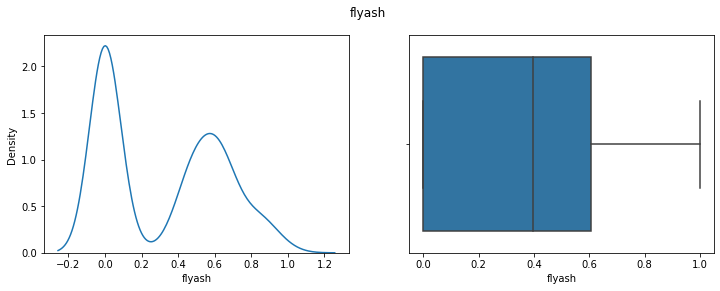

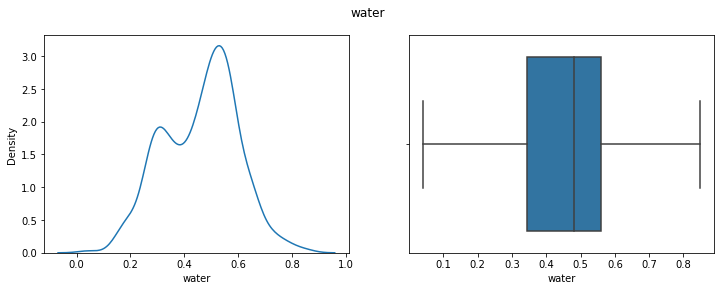

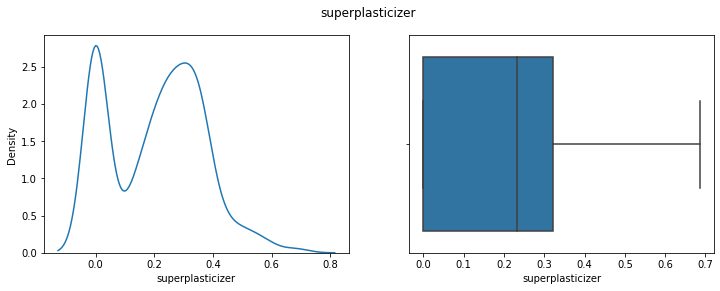

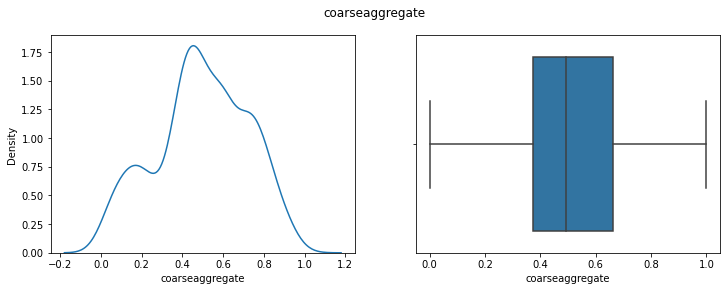

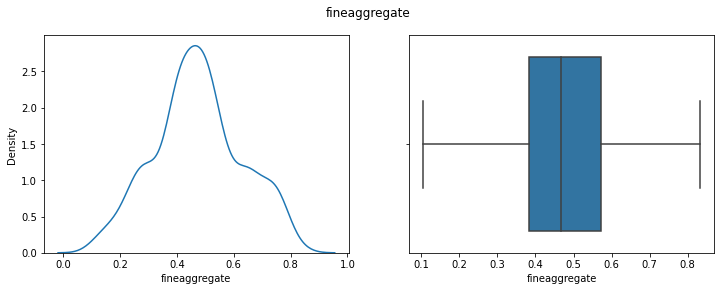

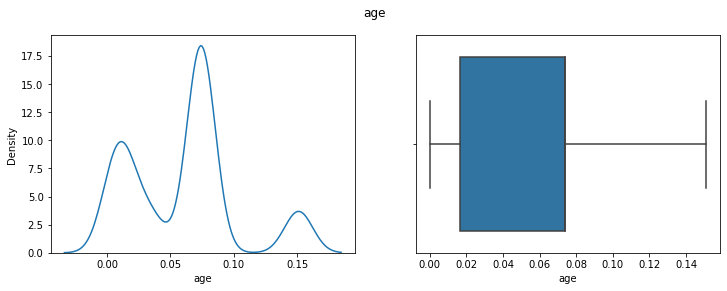

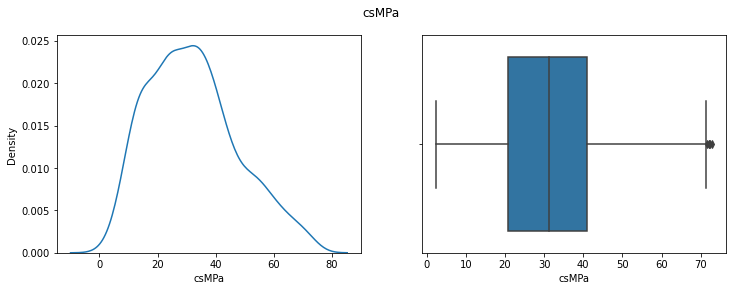

In [9]:
#boxplots 
columns = data_out.columns.tolist()
for col in columns[0:]:
    f,axes = plt.subplots(1,2,figsize=(12,4))
    sns.kdeplot(x=data_out[col],ax=axes[0])
    sns.boxplot(x=data_out[col],ax=axes[1])
    f.suptitle(col)
    plt.show()

data_out is data after removing outliers

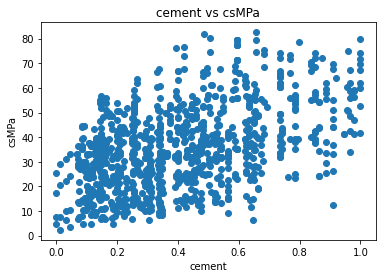

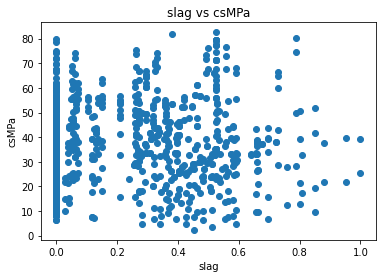

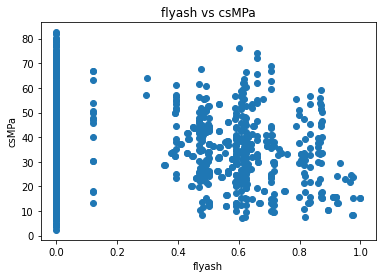

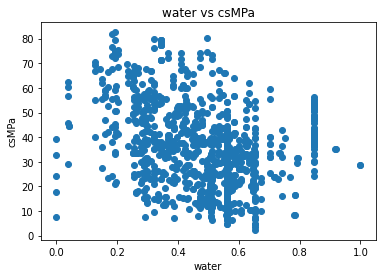

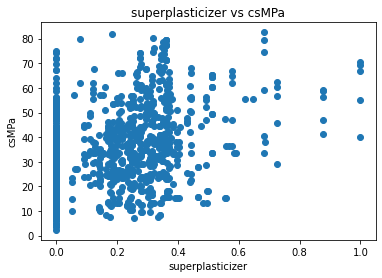

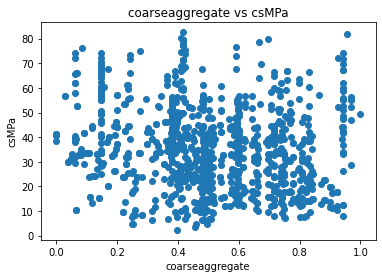

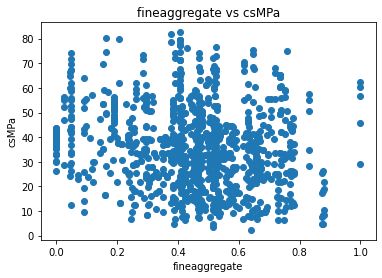

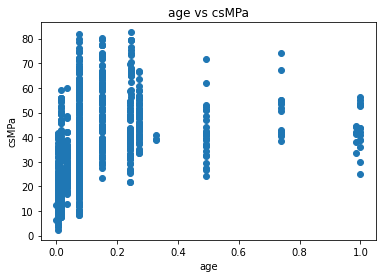

In [22]:
y_col = "csMPa"
x_columns = x.columns.tolist()
for x_col in x_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(x[x_col], data[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    
    plt.show()

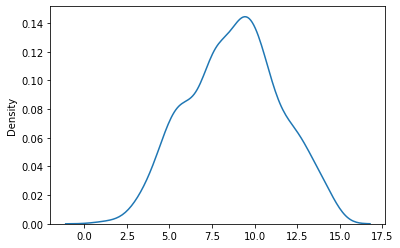

In [10]:
from scipy import stats
y_normal, fitted_lambda = stats.boxcox(data_out['csMPa'])
sns.kdeplot(y_normal)

Test for heteroscedasticity

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
f ='csMPa~cement+slag+flyash+superplasticizer+coarseaggregate+fineaggregate+age'
hetero_model = ols(formula=f, data=data_out).fit()

In [ ]:
white_test = het_white(hetero_model.resid,  hetero_model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 150.10132976418237, 'LM-Test p-value': 3.329902438207532e-16, 'F-Statistic': 5.096229675695676, 'F-Test p-value': 2.069858121902233e-18}


F-test p-value < 0.05, so heteroscedasticity is present

**Fitting the linear regression model**

In [11]:
#Separating independent and dependent variables
x_temp = data_out.drop(['csMPa'],axis=1)
y_temp = y_normal

In [12]:
#Taking the second degree terms alongwith the first degree terms
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

In [13]:
poly = PolynomialFeatures(interaction_only=False, include_bias=True)
x_=poly.fit_transform(x_temp)

In [15]:
x_.shape

(748, 45)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_, y_temp, test_size=0.33, random_state=1)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
from sklearn.metrics import mean_squared_error
r_sq = model.score(x_test, y_test)
print('coefficient of determination:', r_sq)
pred_linreg = model.predict(x_test)
mse_linreg = mean_squared_error(y_test, pred_linreg)
print('MSE:',mse_linreg )

coefficient of determination: 0.8834589209617385
MSE: 0.8819686290659464


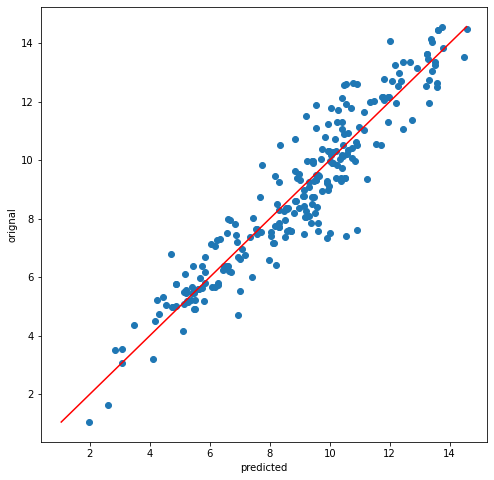

In [18]:
plt.figure(figsize=[8,8])
plt.scatter(pred_linreg,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()


Lasso Regularization to reduce overfitting

In [19]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.000001)
lasso_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.36502085501732, tolerance: 0.34696559668645577
  positive)


Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
r_sq = lasso_reg.score(x_test, y_test)
print('coefficient of determination:', r_sq)
pred_lasso = lasso_reg.predict(x_test)
mse_lasso = mean_squared_error(y_test, pred_lasso)
print('MSE:',mse_lasso )

coefficient of determination: 0.8790625290160184
MSE: 0.9152399854769354


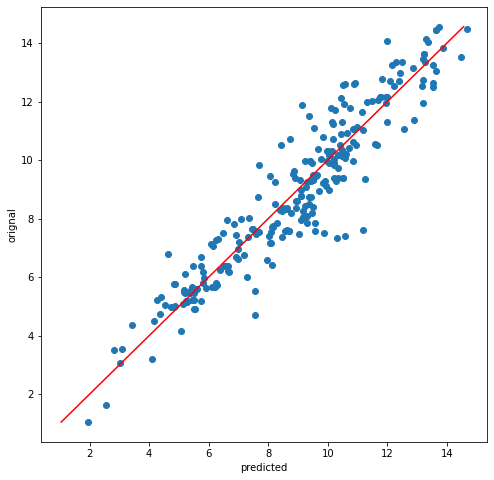

In [21]:
plt.figure(figsize=[8,8])
plt.scatter(pred_lasso,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

# Neural Network - 8 input features, 2 hidden layers (5 nodes in each) and one output layer

In [ ]:
model = Sequential()

In [ ]:
#n_cols = data.shape[1]
#temp = n_cols-1

In [ ]:
model.add(Dense(5,activation='relu',input_shape=(8,))) #first hidden layer(5 nodes), 8 = number of input features 

In [ ]:
model.add(Dense(5,activation='relu')) #second hidden layer(5 nodes)

In [ ]:
model.add(Dense(1)) #output layer

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error') # in adam optimizer, we don't have to specify the learning rate as in gradient descent

In [ ]:
model.fit(x_train,y_train)

Epoch 1/1
824/824 [==============================] - 0s 45us/step - loss: 970.0616


In [ ]:
x_train.shape

(824, 8)

In [ ]:
y_train.shape

(824,)

In [ ]:
x_train.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
536,393.0,0.0,0.0,192.0,0.0,940.6,785.6,28
812,310.0,0.0,0.0,192.0,0.0,970.0,850.0,90
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180
542,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90
325,252.3,0.0,98.8,146.3,14.2,987.8,889.0,14


In [ ]:
y_train.head()

954    13.46
120    56.70
449    35.85
438    41.41
48     26.26
Name: csMPa, dtype: float64

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

array([[ 47.12589   ],
       [ 32.89206   ],
       [ 40.22632   ],
       [ 25.97275   ],
       [ 37.501354  ],
       [ 38.19819   ],
       [ 36.487095  ],
       [ 35.069195  ],
       [ 48.802814  ],
       [ 42.360424  ],
       [  2.9503284 ],
       [ 30.458088  ],
       [ 40.829353  ],
       [ 38.607517  ],
       [-18.331558  ],
       [ 35.409664  ],
       [ 31.109053  ],
       [ 43.409996  ],
       [ 27.863693  ],
       [ 19.881334  ],
       [ 51.464508  ],
       [ 37.18753   ],
       [ 16.72617   ],
       [-31.269718  ],
       [ 35.052544  ],
       [ 38.603924  ],
       [ 38.373768  ],
       [ 40.72403   ],
       [ 50.062042  ],
       [ 41.10658   ],
       [ 19.071129  ],
       [-12.966956  ],
       [ 28.270823  ],
       [ 49.720097  ],
       [  2.0414014 ],
       [-15.282008  ],
       [ 51.49995   ],
       [ 22.243275  ],
       [ 48.141235  ],
       [ 39.32484   ],
       [ 39.105785  ],
       [ 36.26913   ],
       [ 24.267658  ],
       [ 42

In [ ]:
y_test

880    12.18
567    11.96
524    59.49
222    28.63
481    61.07
       ...  
1      61.89
584    21.92
648    29.89
218    40.39
664    19.35
Name: csMPa, Length: 206, dtype: float64